In [4]:
import os
import sys
import torch
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

sys.path.append('data/docile')
sys.path[0] = '/mnt'

from tqdm import tqdm
from pathlib import Path
from torch.nn import CrossEntropyLoss
from PIL import Image, ImageDraw, ImageFont
from concurrent.futures import ThreadPoolExecutor
from docile.dataset import CachingConfig, Dataset
from transformers import LayoutLMForTokenClassification, LayoutLMTokenizer
from deepinsurancedocs.data_preparation.data_utils import label_dict_transform  # nopep8
from deepinsurancedocs.data_preparation.layoutlm_dataset import LayoutLMDataset, read_examples_from_file  # nopep8
from deepinsurancedocs.data_preparation.preprocessing import normalize_bbox  # nopep8


DATASET_PATH = Path("/domino/datasets/docile/data/docile/")
output_folder = '/domino/datasets/local/DeepInsuranceDocs/docile/'

In [6]:
   
data_dir = '/domino/datasets/local/DeepInsuranceDocs/docile'
dataset_name = 'docile'

# ------------------------------------- Tokenizer -------------------------------------- #
tokenizer = LayoutLMTokenizer.from_pretrained(pretrained_model_name_or_path="microsoft/layoutlm-base-uncased")

# ---------------------------------------- Data ---------------------------------------- #
train_examples = read_examples_from_file(data_dir, mode='train')
test_examples = read_examples_from_file(data_dir, mode='test')

loading examples from files: 100%|██████████| 632/632 [00:02<00:00, 311.49it/s]


In [ ]:
missing_page_height_files = []
missing_page_width_files = []
docile_data_dict = {} 

json_files = glob.glob('/domino/datasets/local/DeepInsuranceDocs/docile/train/*/*.json')

for json_path in tqdm(json_files, total = len(json_files)):
    with open(json_path, 'r') as f:
        data=json.load(f)
    if 'page_height' not in data.keys():
        missing_page_height_files.append(json_path)
    if 'page_width' not in data.keys():
        missing_page_width_files.append(json_path)
    docile_data_dict[json_path]=data

In [40]:
docile_data_dict[missing_page_height_files[0]]
missing_page_height_files

['/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/009bdcdec5c04cd3b2e31555.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/00a5c8697856473393f3f9e2.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/00c87916e4a44197b45b0f8b.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/01628ff7c56f4b1995c3048e.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/016985e27277483dbc599e9b.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/0178861dd64f4c58bbd4367a.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/01a13a4f5d2748d6a57e9a67.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/3d2f2e78b8e449c297b5da48_1.json',
 '/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/a3f51835ee5a479cb87f85fe_1.json']

In [43]:
test

Dataset(split_name='test', dataset_path=PosixPath('/domino/datasets/docile/data/docile'))

In [121]:


# test = Dataset("val", DATASET_PATH, load_annotations=False, load_ocr=False)

# test_paths = []
# for document in tqdm(test, total=len(test)):
#     for page in range(document.page_count):
#         test_paths.append(f"/domino/datasets/local/DeepInsuranceDocs/docile/test/annotations/{document.docid}_{page}.json")
        
  

100%|██████████| 500/500 [00:12<00:00, 39.91it/s]


In [122]:
# train = Dataset("train", DATASET_PATH, load_annotations=False, load_ocr=False)

# train_paths = []
# for document in tqdm(train, total=len(train)):
#     for page in range(document.page_count):
#         train_paths.append(f"/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/{document.docid}_{page}.json")

100%|██████████| 5179/5179 [03:41<00:00, 23.39it/s]


In [124]:
# domino_test_paths = glob.glob('/domino/datasets/local/DeepInsuranceDocs/docile/test/annotations/*.json')
# len(test_paths) == domino_test_paths
# for path in test_paths:
#     if path not in domino_test_paths:
#         print(path)

/domino/datasets/local/DeepInsuranceDocs/docile/test/annotations/01cfcdac81ae44e8a06440ad_0.json
/domino/datasets/local/DeepInsuranceDocs/docile/test/annotations/3d2f2e78b8e449c297b5da48_1.json
/domino/datasets/local/DeepInsuranceDocs/docile/test/annotations/a3f51835ee5a479cb87f85fe_1.json


In [133]:
# domino_train_paths = glob.glob('/domino/datasets/local/DeepInsuranceDocs/docile/train/annotations/*.json')
# if not len(train_paths) == len(domino_train_paths):
#     print(len(train_paths))
#     print(len(domino_train_paths))
# for path in train_paths:
#     if path not in domino_train_paths:
#         print(path)

In [134]:
# docile_data_dict = {} 

# for json_path in tqdm(json_files, total = len(json_files)):
#     with open(json_path, 'r') as f:
#         data=json.load(f)
#     docile_data_dict['path']=data

In [95]:
# # Delete files that are not in train set 
# for path in domino_paths:
#     delete = False
#     domino_docid = path.split('/')[-1].split('.')[0]
#     if domino_docid[-2]!=('_'):
#         delete = True
#     elif domino_docid .split('_')[0] not in docid_list:
#         delete = True
#     if delete == True:
#         os.remove(path)

In [190]:
train_image_folder = os.path.join(data_dir, 'train', 'images')
train_annot_folder = os.path.join(data_dir, 'train', 'annotations')

test_image_folder = os.path.join(data_dir, 'test', 'images')
test_annot_folder = os.path.join(data_dir, 'test', 'annotations')

100%|██████████| 6758/6758 [02:38<00:00, 42.63it/s]


In [ ]:
# TRAIN 

train_examples = {}

# Assuming `train_examples` is a list of objects with the provided structure
# and `train_image_folder` is the path to the folder containing the images
for path in tqdm(glob.glob(f"{train_annot_folder}/*.json"), total = len(glob.glob(f"{train_annot_folder}/*.json"))):
    docid=path.split('/')[-1].split('_')[0]
    with open(path, 'r') as f:
        train_examples[docid] = json.load(f)

In [285]:
# TEST

test_examples = {}

# Assuming `test_examples` is a list of objects with the provided structure
# and `test_image_folder` is the path to the folder containing the images
for path in tqdm(glob.glob(f"{test_annot_folder}/*.json"), total = len(glob.glob(f"{test_annot_folder}/*.json"))):
    docid=path.split('/')[-1].split('_')[0]
    with open(path, 'r') as f:
        test_examples[docid] = json.load(f)

100%|██████████| 632/632 [00:10<00:00, 58.92it/s]


In [14]:
from PIL import Image
import numpy as np

def create_colormap(label_list):
    # Get unique labels
    unique_labels = list(set(label_list))

    # Assign a unique color to each label
    colormap = {label: tuple(np.random.randint(0, 256, 3)) for label in unique_labels}


    return colormap

In [30]:
set_labels = set()

for ex in tqdm(train_examples, total = len(train_examples)):
    set_labels.update(ex.labels)


print(set_labels)

label_list = {}
for i, item in enumerate(set_labels):
    label_list[str(i)] = item

print(label_list)

100%|██████████| 6758/6758 [00:00<00:00, 193663.06it/s]

{'currency_code_amount_due', 'iban', 'O', 'customer_order_id', 'customer_billing_address', 'customer_delivery_address', 'vendor_address', 'account_num', 'customer_other_name', 'amount_due', 'amount_total_gross', 'document_id', 'customer_billing_name', 'vendor_order_id', 'customer_tax_id', 'vendor_tax_id', 'vendor_email', 'bank_num', 'tax_detail_net', 'bic', 'customer_other_address', 'customer_delivery_name', 'vendor_name', 'order_id', 'vendor_registration_id', 'date_due', 'payment_terms', 'tax_detail_gross', 'customer_id', 'amount_paid', 'amount_total_net', 'tax_detail_rate', 'date_issue', 'amount_total_tax', 'payment_reference', 'customer_registration_id', 'tax_detail_tax'}
{'0': 'currency_code_amount_due', '1': 'iban', '2': 'O', '3': 'customer_order_id', '4': 'customer_billing_address', '5': 'customer_delivery_address', '6': 'vendor_address', '7': 'account_num', '8': 'customer_other_name', '9': 'amount_due', '10': 'amount_total_gross', '11': 'document_id', '12': 'customer_billing_nam

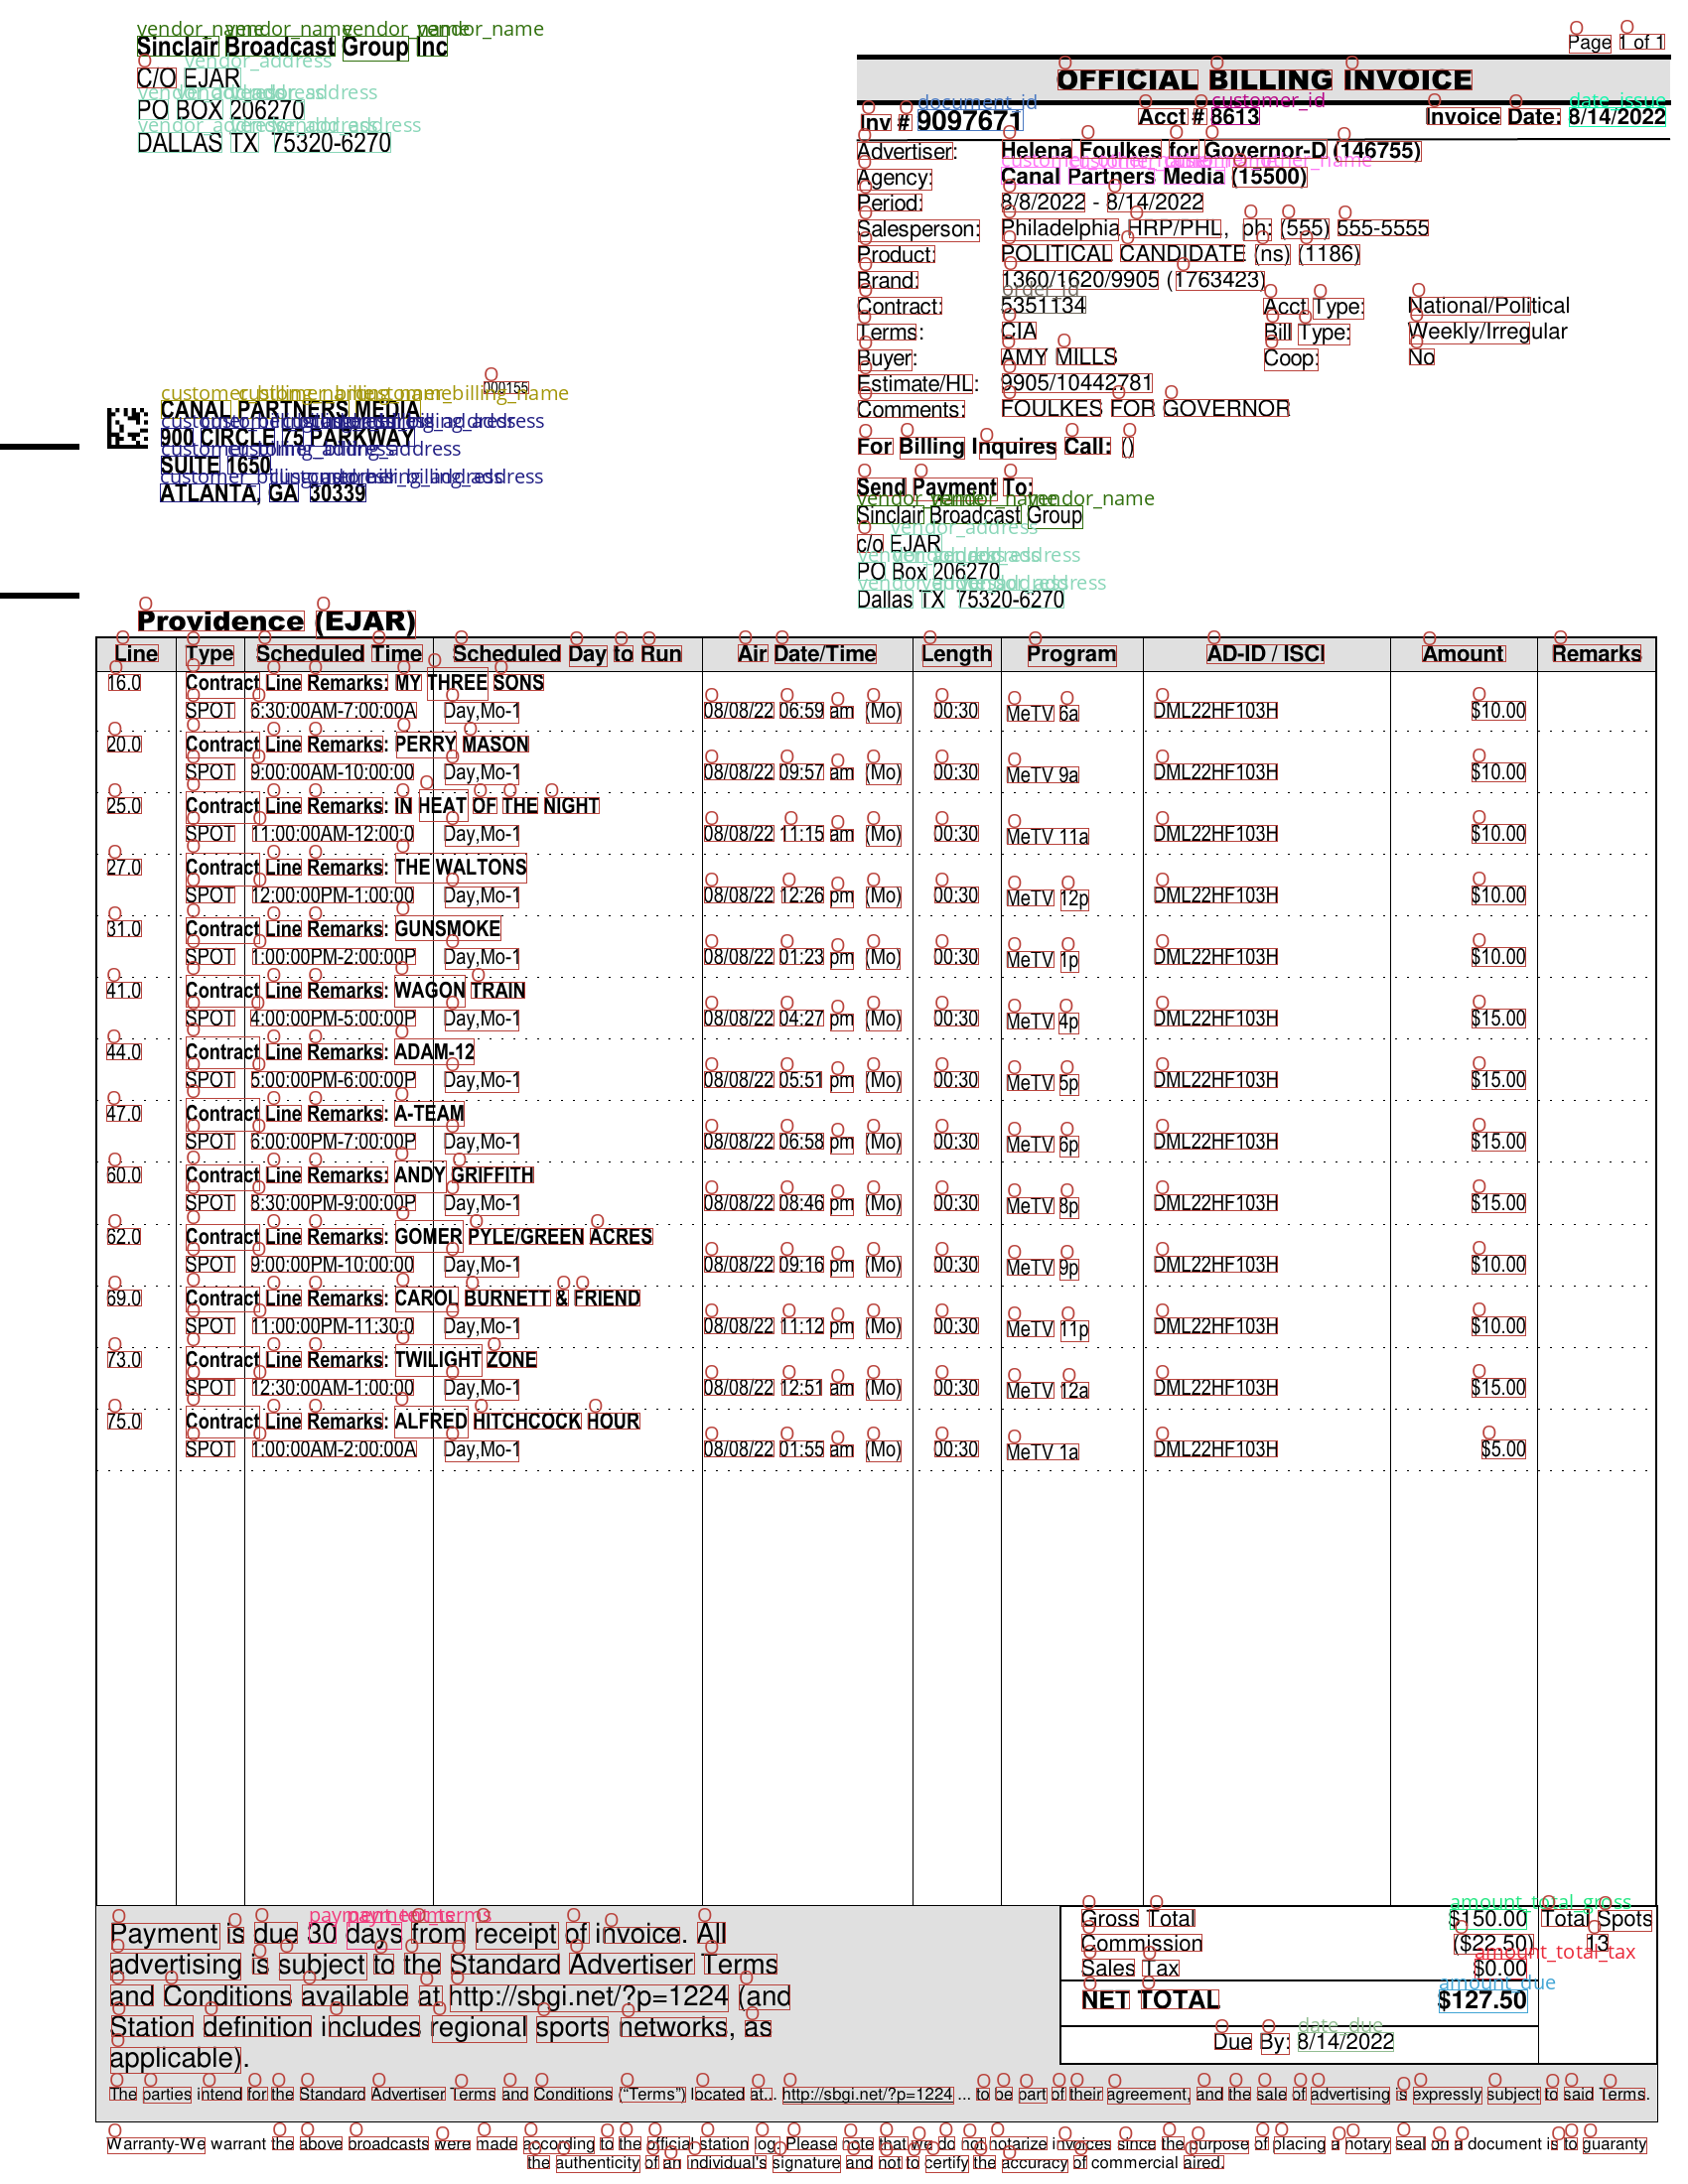

In [20]:
train_image_folder = os.path.join(data_dir, 'train', 'images')
train_annot_folder = os.path.join(data_dir, 'train', 'annotations')
# Assuming `train_examples` is a list of objects with the provided structure
# and `train_image_folder` is the path to the folder containing the images
        

ex = train_examples[np.random.randint(0,len(train_examples))]
docid = ex.file_name.split('_')[0]
# Load the image
page = 0
image_path = os.path.join(train_image_folder, f'{docid}_{page}.png')
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
font_size = 20
font = ImageFont.truetype('/mnt/config/opensans.ttf', font_size)

# Define a colormap for different colors for each label
colormap = create_colormap(ex.labels)


# Plot bounding boxes and labels
for bbox, label in zip(ex.actual_bboxes, ex.labels):
    x, y, w, h = bbox
    draw.rectangle([x, y, w, h], outline=colormap[label])

    # Display label above the bounding box
    draw.text((x, y-22), label, fill=colormap[label], font=font, )

# Show the image in the notebook
display(image)

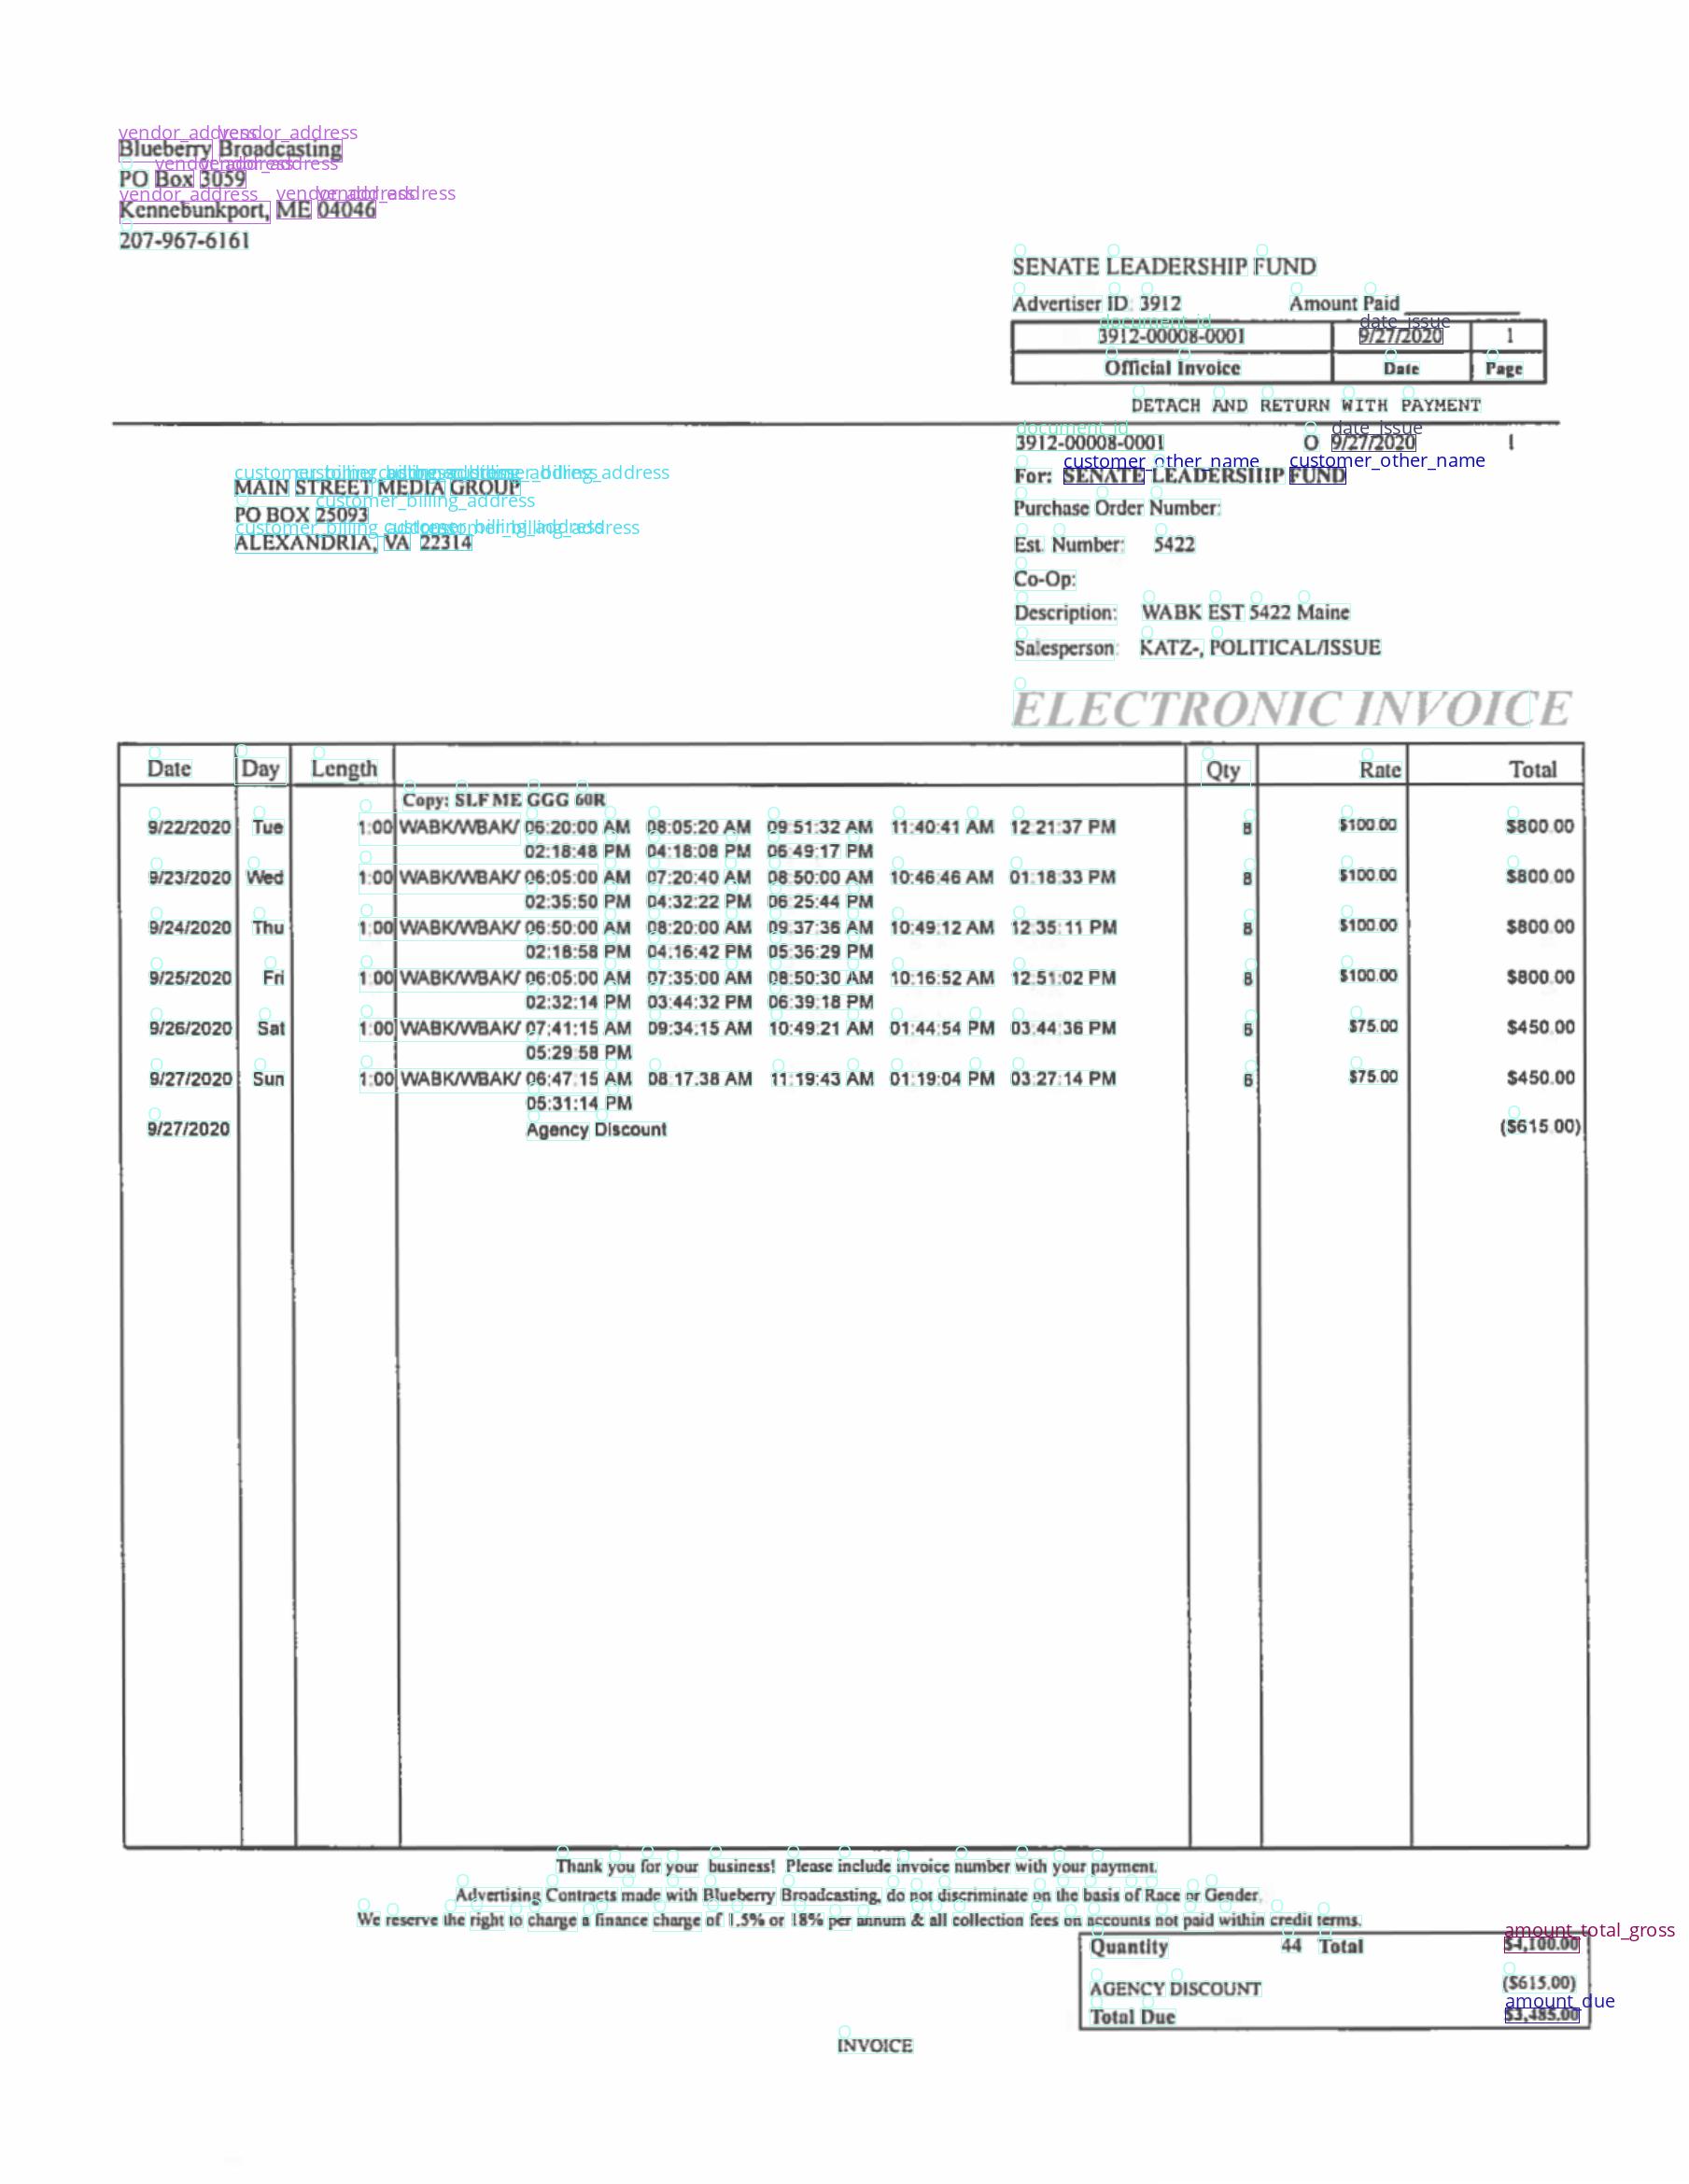

In [295]:
test_image_folder = os.path.join(data_dir, 'test', 'images')
test_annot_folder = os.path.join(data_dir, 'test', 'annotations')
# Assuming `test_examples` is a list of objects with the provided structure
# and `test_image_folder` is the path to the folder containing the images
        
docid = list(test_examples.keys())[np.random.randint(0, len(test))]
ex = test_examples[docid]

# Load the image
page = 0
image_path = os.path.join(test_image_folder, f'{docid}_{page}.png')
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
font_size = 20
font = ImageFont.truetype('/mnt/config/opensans.ttf', font_size)

# Define a colormap for different colors for each label
colormap = create_colormap(ex['labels'])


# Plot bounding boxes and labels
for bbox, label in zip(ex['bboxes'], ex['labels']):
    x, y, w, h = bbox
    draw.rectangle([x, y, w, h], outline=colormap[label])

    # Display label above the bounding box
    draw.text((x, y-22), label, fill=colormap[label], font=font, )

# Show the image in the notebook
display(image)